# TripAdvisor Hotel Reviews Sentiment Analysis Project

## Initial Data Analysis

This Jupyter notebook performs an initial data analysis.

###Install needed libraries

In [ ]:
!pip install huggingface_hub

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 46.2 MB/s eta 0:00:00


### Import needed modules and libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess
from huggingface_hub import hf_hub_download

### Exploratory Data Analysis

In [14]:

#Load the TripAdvisor dataset from Hugging Face
df = pd.read_parquet("hf://datasets/jniimi/tripadvisor-review-rating/data/train-00000-of-00001.parquet")


After loading the dataset, we perform some initial data analysis to gather some insights. We also add another column called "sentiment" which will contain the negative, neutral or positive sentiment depending on the "overall" rating.

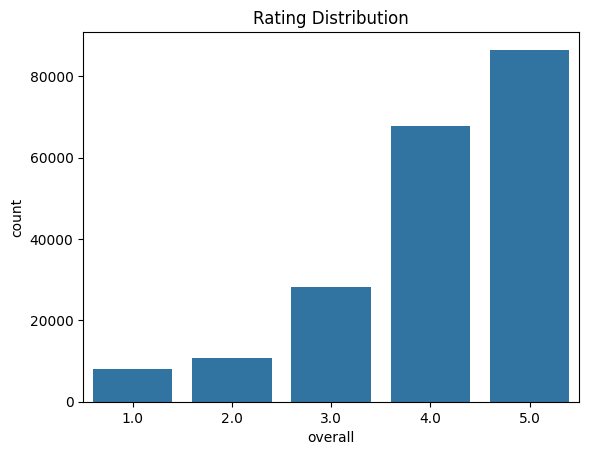

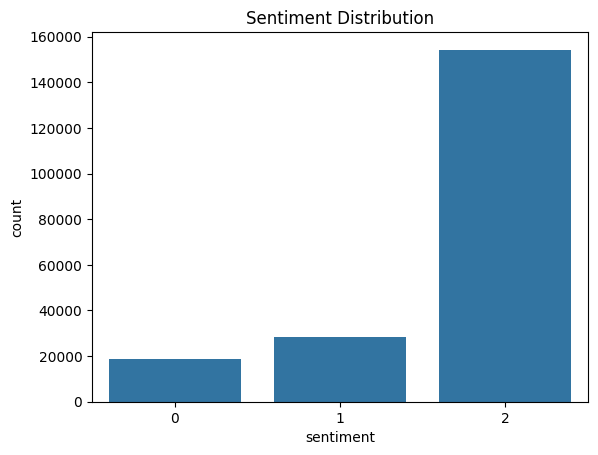

In [15]:

#Create plot with the rating distribution
df["overall"].value_counts().sort_index()
sns.countplot(data=df, x='overall')
plt.title("Rating Distribution")
plt.show()
print("")

df['sentiment'] = df['overall'].apply(lambda x: 0 if x == 1 else 0 if x == 2
                                      else 1 if x == 3 else 2)

#Create plot with sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [16]:
#Check first few rows of data
df[["review", "overall", "sentiment"]].head()

,review,overall,sentiment
0,Really excellent Hilton\nStayed here on busine...,5.0,2
1,Exceptional service and comfort\nSpent two nig...,5.0,2
2,Nice room and five star service\nGreat place f...,5.0,2
3,"BRILLIANT hotel, my #1 Chicago pick for busine...",5.0,2
4,Convenient and comfortable\nBEST. BREAKFAST. E...,5.0,2


In [17]:
#Filter dataframe to columns of interest
df2 = df[["sentiment","review","overall"]]
df2

,sentiment,review,overall
0,2,Really excellent Hilton\nStayed here on busine...,5.0
1,2,Exceptional service and comfort\nSpent two nig...,5.0
2,2,Nice room and five star service\nGreat place f...,5.0
3,2,"BRILLIANT hotel, my #1 Chicago pick for busine...",5.0
4,2,Convenient and comfortable\nBEST. BREAKFAST. E...,5.0
...,...,...,...
201290,2,Great find in cool neighborhood\nAlthough a na...,4.0
201291,2,Exceptional Service and great room\nI have sta...,5.0
201292,0,Beware of the Rip Off!\nI received a call for ...,2.0
201293,2,It Deserves the Rating\nI really like Kimptons...,5.0


We would now like to check most common words in the reviews.

In [18]:
def remove_stopword_individual(i):
    result = simple_preprocess(i)
    result = " ". join(result)
    return remove_stopwords(result)

df3 = df2.copy()

#Create column containing reviews without the stopwords and some data cleaning
df3.loc[:, "review without stopwords"] = df3["review"].apply(lambda x:
                                                             remove_stopword_individual(x))



[('hotel', 393728), ('room', 305246), ('great', 189052), ('stay', 158145), ('staff', 145437), ('location', 132033), ('good', 118146), ('nice', 111987), ('rooms', 104601), ('clean', 91006), ('service', 87031), ('stayed', 83368), ('breakfast', 77655), ('night', 74574), ('time', 66286), ('friendly', 66046), ('comfortable', 60652), ('desk', 59807), ('area', 57919), ('place', 57878), ('like', 54878), ('day', 53144), ('bed', 53035), ('helpful', 51255), ('small', 49482), ('free', 47248), ('floor', 45812), ('check', 44214), ('walk', 42322), ('bathroom', 41915)]


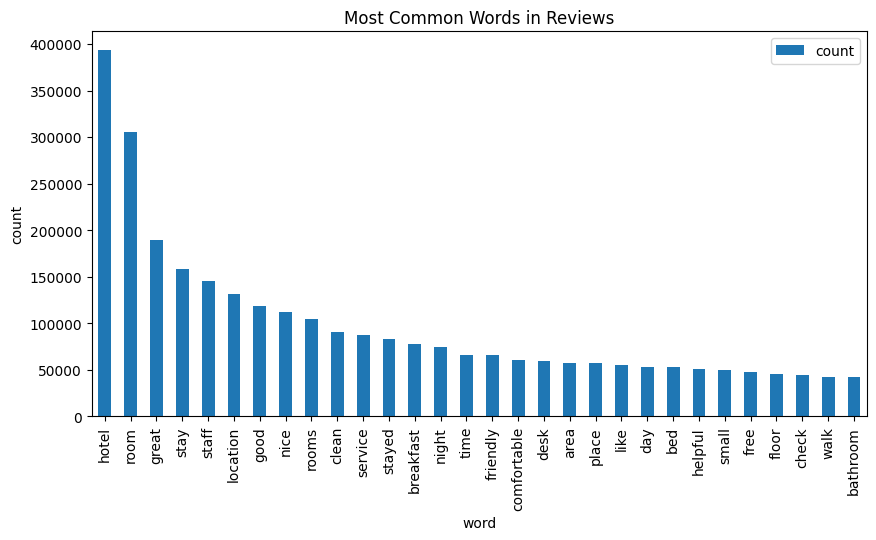

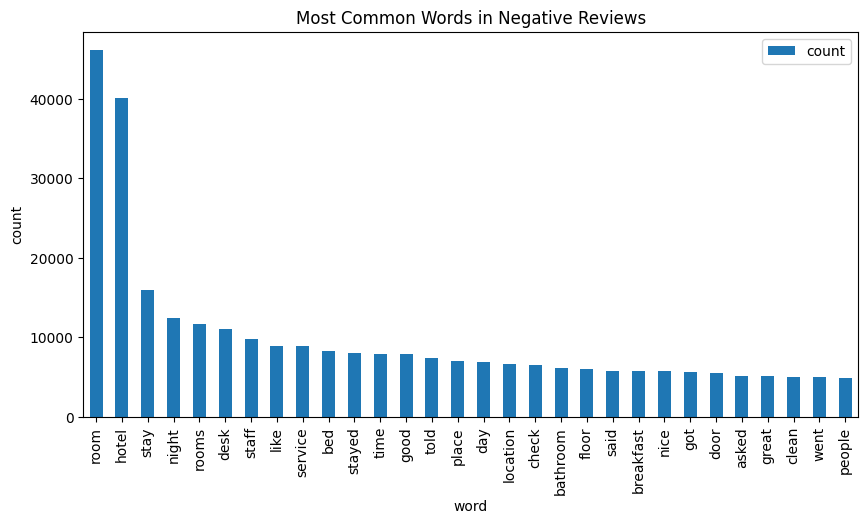

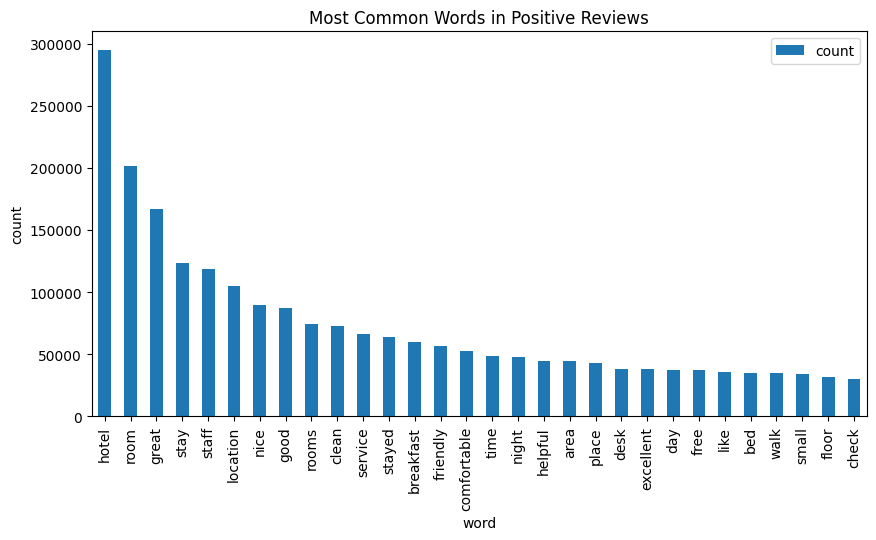

In [19]:

#Make plot with most common words in reviews

all_words = df3["review without stopwords"].tolist()
all_words = " ".join(all_words)
all_words = all_words.split()
counter = Counter(all_words)
most_common_words = counter.most_common(30)
print(most_common_words)

most_common_words_df = pd.DataFrame(most_common_words, columns=["word", "count"])

most_common_words_df.plot(x="word", y="count", kind="bar", figsize=(10, 5))

plt.xlabel("word")
plt.ylabel("count")
plt.title("Most Common Words in Reviews")
plt.show()

print("")

#Make plot with most common words in negative reviews
words_negative_reviews = df3[df3["sentiment"] == 0]["review without stopwords"].tolist()
words_negative_reviews = " ".join(words_negative_reviews)
words_negative_reviews = words_negative_reviews.split()
counter = Counter(words_negative_reviews)
most_common_words = counter.most_common(30)



most_common_words_df = pd.DataFrame(most_common_words, columns=["word", "count"])

most_common_words_df.plot(x="word", y="count", kind="bar", figsize=(10, 5))

plt.xlabel("word")
plt.ylabel("count")
plt.title("Most Common Words in Negative Reviews")
plt.show()

print("")

#Make plot with most common words in positive reviews
words_positive_reviews = df3[df3["sentiment"] == 2]["review without stopwords"].tolist()
words_positive_reviews = " ".join(words_positive_reviews)
words_positive_reviews = words_positive_reviews.split()
counter = Counter(words_positive_reviews)
most_common_words = counter.most_common(30)

most_common_words_df = pd.DataFrame(most_common_words, columns=["word", "count"])

most_common_words_df.plot(x="word", y="count", kind="bar", figsize=(10, 5))

plt.xlabel("word")
plt.ylabel("count")
plt.title("Most Common Words in Positive Reviews")
plt.show()



<Axes: title={'center': 'Top 30 most common review lengths'}, xlabel='Review Length', ylabel='Count'>

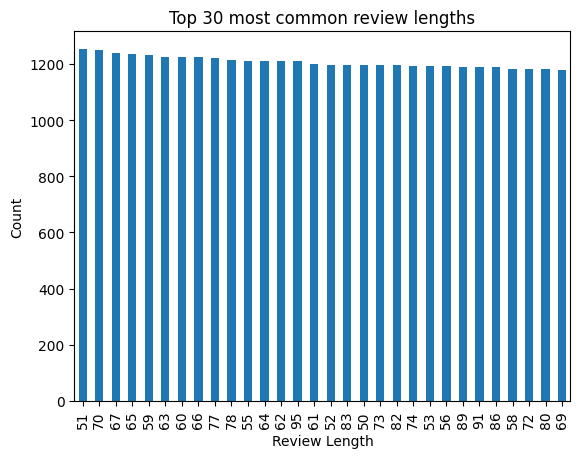

In [20]:
def get_string_length(sentence):
  return len(sentence.split())

df3["review length"] = df3["review"].apply(lambda x: get_string_length(x))

#Get most common review lengths and plot
df3.groupby("review length")["review length"].count().nlargest(30).plot(kind="bar", xlabel = "Review Length", ylabel = "Count", title = "Top 30 most common review lengths")